In [26]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import ipyvolume as ipv

In [27]:
#----build field----
#cooefitien of size
k = 4

#size of field
x = 10*k
y = 10*k
z = 10*k

#target point
point = [8*k, 5*k, 8*k]

#obstical
p_obs = [5*k,5*k,5*k]
r_o = 5

#start point
p_start = [2*k, 5*k, 2*k]

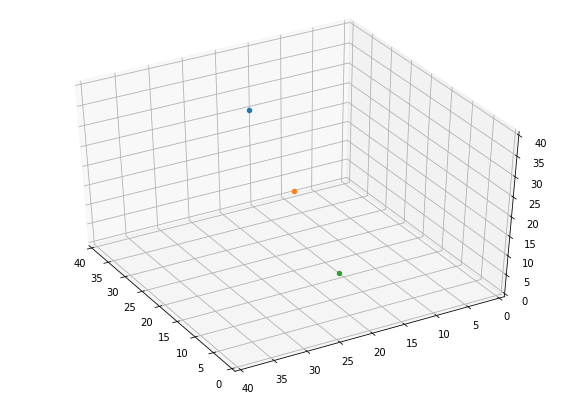

In [28]:
fig = plt.figure(figsize=(10,7))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(point[0],point[1],point[2], 'o')
ax.scatter(p_obs[0],p_obs[1],p_obs[2], 'o')
ax.scatter(p_start[0],p_start[1],p_start[2], 'o')

ax.set_xlim3d(0,10*k)
ax.set_ylim3d(0,10*k)
ax.set_zlim3d(0,10*k)
ax.view_init(40, 150)

plt.show()

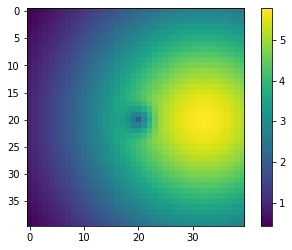

In [29]:
#----make field matrics----
#make field of target
field = np.zeros(shape=(x,y,z))
#field of obstical
obs_field1 = np.zeros(shape=(x,y,z))

for u in range(0, z):
    for i in range(0, x):
        for j in range(0, y): 
            r_targ = math.sqrt((i - point[0]) ** 2 + (j - point[1]) ** 2 + (u - point[2]) ** 2)
            field[u,j,i] = ((r_targ - 50)**2)/250

            r2 = math.sqrt((i - p_obs[0]) ** 2 + (j - p_obs[1]) ** 2 + (u - p_obs[2]) ** 2)
            if (r2 > r_o):
                obs_field1[u,j,i] = 0
            else:
                obs_field1[u,j,i] = ((r2 - r_o)**2)/10
        
result_field = field - obs_field1

#plt.figure(figsize=(10,10))
plt.imshow(result_field[20])
plt.colorbar();

In [30]:
courent_point = p_start
courent_ind = [p_start[0], p_start[1], p_start[2]]
check_ind = courent_ind
traj_x = [p_start[0]]
traj_y = [p_start[1]]
traj_z = [p_start[2]]

In [31]:
while(courent_ind != point):
    check_field = np.zeros(shape=(3,3,3))
    max_ind_x = 0
    max_ind_y = 0
    max_ind_z = 0

    for u in range(-1,2):
        for i in range(-1,2):
            for j in range(-1,2):
                check_field[u+1,i+1,j+1] = result_field[courent_ind[2]+u,courent_ind[1]+i, courent_ind[0]+j]
        #check_field[1,1] = 0    

    max_f = 0
    for u in range(-1,2):
        for i in range(-1,2):
            for j in range(-1,2):
                if (check_field[u+1,i+1,j+1] > max_f):
                    max_ind_x = j
                    max_ind_y = i
                    max_ind_z = u
                    max_f = check_field[u+1,i+1,j+1]

    courent_ind[0] += max_ind_x
    courent_ind[1] += max_ind_y
    courent_ind[2] += max_ind_z
    
    traj_x.append(courent_ind[0])
    traj_y.append(courent_ind[1])
    traj_z.append(courent_ind[2])

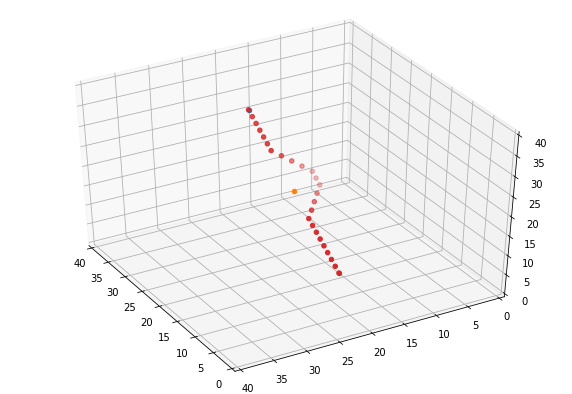

In [32]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(point[0],point[1],point[2], 'o')
ax.scatter(p_obs[0],p_obs[1],p_obs[2], 'o')
ax.scatter(p_start[0],p_start[1],p_start[2], 'o')
ax.scatter(traj_x,traj_y,traj_z, 'o')

ax.set_xlim3d(0,10*k)
ax.set_ylim3d(0,10*k)
ax.set_zlim3d(0,10*k)

# Provide starting angle for the view.
ax.view_init(40, 150)

plt.show()

In [37]:
traj_x = np.array(traj_x); traj_y = np.array(traj_y); traj_z = np.array(traj_z);

k_st = 0
k_f = 25

fig = ipv.figure(figsize=(10,10))
scatter = ipv.scatter(traj_x[k_st:k_f],traj_y[k_st:k_f],traj_z[k_st:k_f], marker='sphere', color='red', size=10)
ipv.xyzlim(0, 40)
ipv.show()